# Import Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers

# Define a Dataset

In [2]:
cifar10 = tf.keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

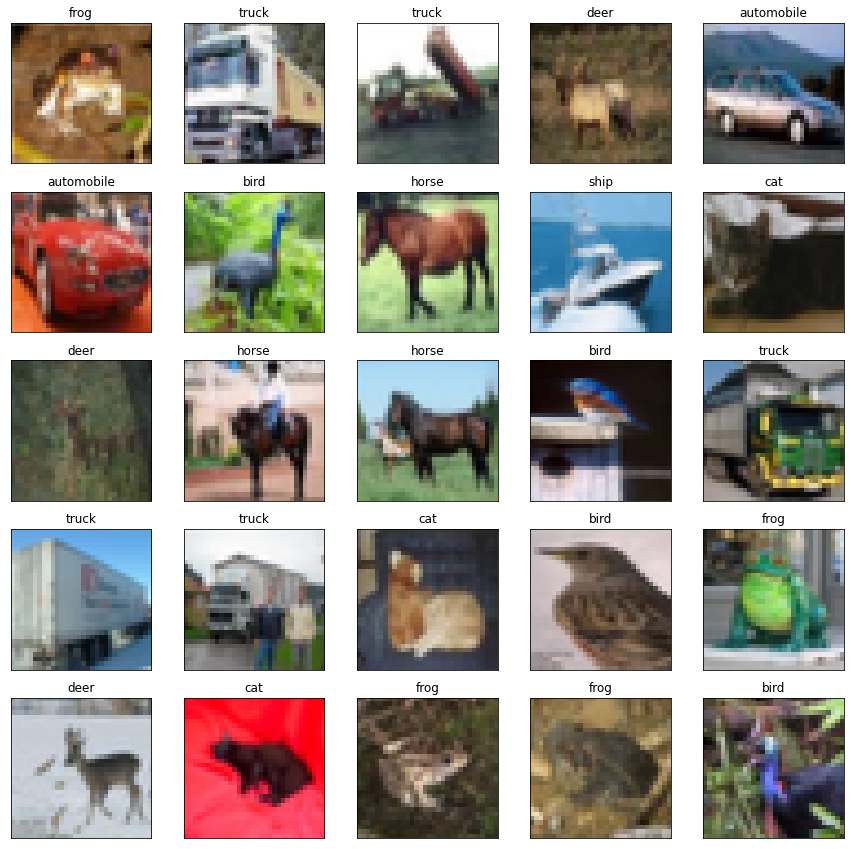

In [5]:
plt.figure(figsize=(15,15))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(train_images[i])
  plt.title(class_names[train_labels[i][0]])
  plt.xticks([])
  plt.yticks([])

plt.show()

In [9]:
train_images = train_images / 255
test_images = test_images / 255

In [10]:
train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))

# Neural Network CNN

In [12]:
model = tf.keras.Sequential([
                             layers.Conv2D(32,(3,3), activation='relu', strides=(1,1), input_shape=(32,32,3)),
                             layers.MaxPool2D((2,2)),

                             layers.Conv2D(64, (3,3), activation='relu', strides=(1,1)),
                             layers.MaxPool2D((2,2)),

                             layers.Conv2D(128, (3,3), activation='relu', strides=(1,1)),
                             layers.MaxPool2D((2,2)),

                             layers.Dropout(0.5),

                             layers.Flatten(),
                             layers.Dense(128, activation='relu'),
                             layers.Dense(64, activation='relu'),
                             layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 2, 2, 128)        

In [13]:
c = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 39s 4ms/step - loss: 1.8713 - accuracy: 0.2904 - val_loss: 1.3759 - val_accuracy: 0.4930
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3158 - accuracy: 0.5254 - val_loss: 1.1853 - val_accuracy: 0.5774
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1647 - accuracy: 0.5831 - val_loss: 1.0146 - val_accuracy: 0.6404
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0714 - accuracy: 0.6187 - val_loss: 0.9637 - val_accuracy: 0.6579
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0012 - accuracy: 0.6433 - val_loss: 0.9060 - val_accuracy: 0.6805
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9521 - accuracy: 0.6635 - val_loss: 0.8674 - val_accuracy: 0.6950
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9188 - accuracy: 0.6757 - val_loss: 0.8591 - val_accuracy

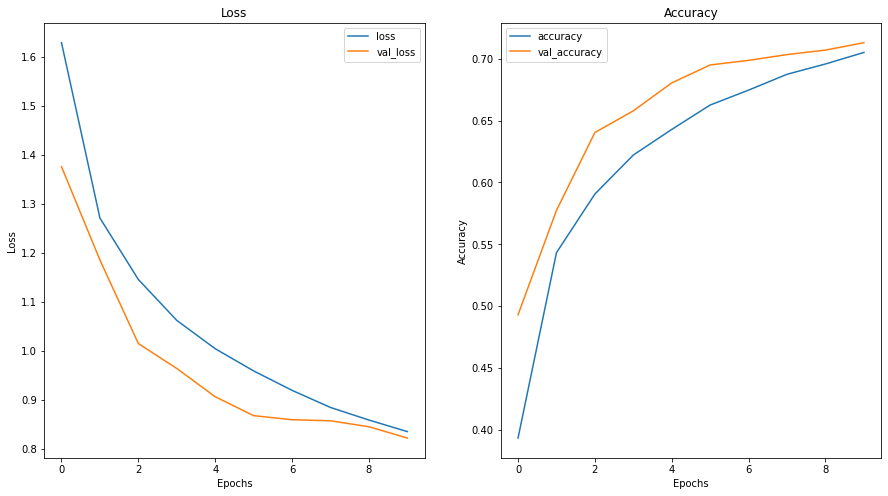

In [14]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.plot(c.history['loss'], label='loss')
plt.plot(c.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(122)
plt.plot(c.history['accuracy'], label='accuracy')
plt.plot(c.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 2

In [15]:
model2 = tf.keras.Sequential([
                             layers.Conv2D(32,(3,3), activation='relu', strides=(1,1), input_shape=(32,32,3)),
                             layers.MaxPool2D((2,2)),

                             layers.Conv2D(64, (3,3), activation='relu', strides=(1,1)),
                             layers.MaxPool2D((2,2)),

                             layers.Conv2D(128, (3,3), activation='relu', strides=(1,1)),
                             layers.MaxPool2D((2,2)),

                             layers.Dropout(0.5),

                             layers.Flatten(),
                             layers.Dense(128, activation='relu'),
                             layers.Dense(64, activation='relu'),
                             layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 2, 2, 128)        

In [16]:
c = model2.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8486 - accuracy: 0.3052 - val_loss: 1.3459 - val_accuracy: 0.5055
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3388 - accuracy: 0.5133 - val_loss: 1.1595 - val_accuracy: 0.5828
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1661 - accuracy: 0.5849 - val_loss: 1.0461 - val_accuracy: 0.6350
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0633 - accuracy: 0.6230 - val_loss: 0.9771 - val_accuracy: 0.6542
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9984 - accuracy: 0.6480 - val_loss: 0.9372 - val_accuracy: 0.6666
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9516 - accuracy: 0.6658 - val_loss: 0.9222 - val_accuracy: 0.6743
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9018 - accuracy: 0.6831 - val_loss: 0.8615 - val_accuracy:

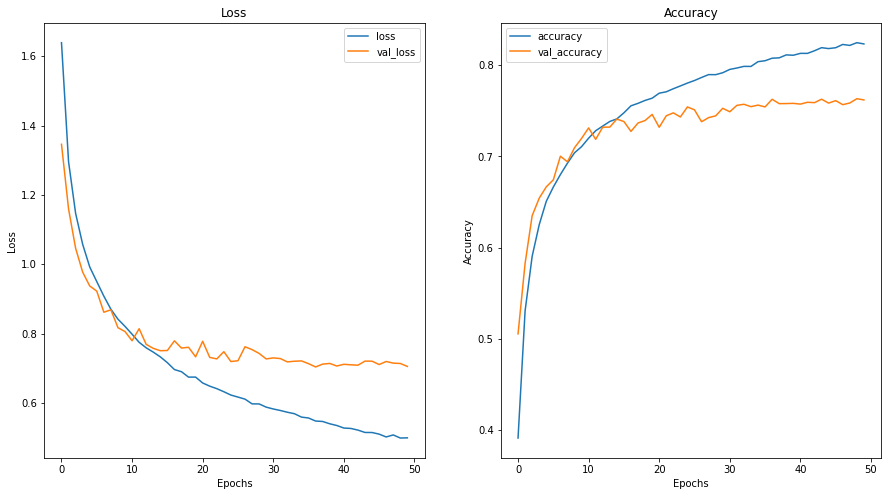

In [17]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.plot(c.history['loss'], label='loss')
plt.plot(c.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(122)
plt.plot(c.history['accuracy'], label='accuracy')
plt.plot(c.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 3

In [24]:
model3 = tf.keras.Sequential([
                             layers.Conv2D(32,(3,3), activation='relu', strides=(1,1), input_shape=(32,32,3)),                              
                             layers.Conv2D(64, (3,3), activation='relu', strides=(1,1)),
                             layers.MaxPool2D((2,2)),
                             layers.Dropout(0.5),

                             layers.Conv2D(128, (3,3), activation='relu', strides=(1,1)),
                             layers.MaxPool2D((2,2)),
                             layers.Dropout(0.5),

                             layers.Flatten(),
                             layers.Dense(128, activation='relu'),
                             layers.Dense(64, activation='relu'),
                             layers.Dense(10, activation='softmax')
])

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 6, 6, 128)        

In [25]:
c = model3.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 [==============================] - 9s 5ms/step - loss: 1.7635 - accuracy: 0.3478 - val_loss: 1.2620 - val_accuracy: 0.5530
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1736 - accuracy: 0.5828 - val_loss: 1.0023 - val_accuracy: 0.6562
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0085 - accuracy: 0.6424 - val_loss: 0.9188 - val_accuracy: 0.6839
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9300 - accuracy: 0.6731 - val_loss: 0.8817 - val_accuracy: 0.6975
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8654 - accuracy: 0.6967 - val_loss: 0.8323 - val_accuracy: 0.7164
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8190 - accuracy: 0.7124 - val_loss: 0.7786 - val_accuracy: 0.7379
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7761 - accuracy: 0.7278 - val_loss: 0.7866 - val_accuracy:

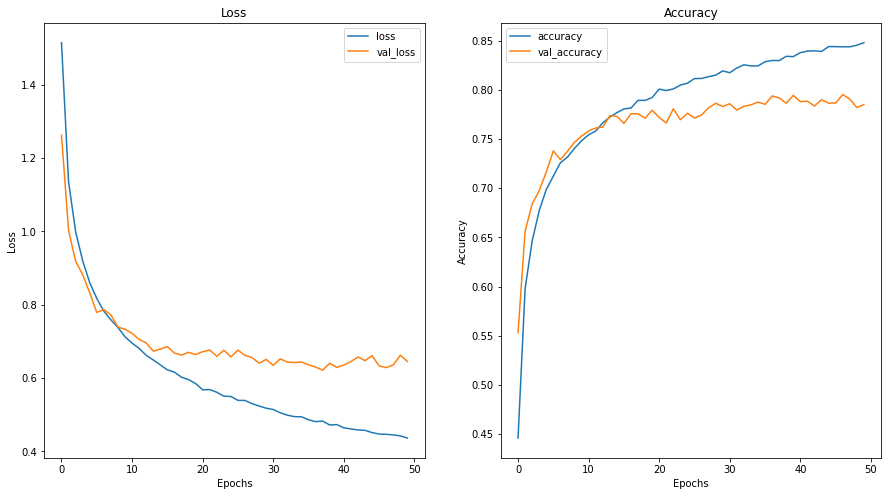

In [26]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.plot(c.history['loss'], label='loss')
plt.plot(c.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(122)
plt.plot(c.history['accuracy'], label='accuracy')
plt.plot(c.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 4

In [32]:
model4 = tf.keras.Sequential([
                             layers.Conv2D(32,(3,3), activation='relu', strides=(1,1), input_shape=(32,32,3)),                              
                             layers.Conv2D(64, (3,3), activation='relu', strides=(1,1)),
                             layers.MaxPool2D((2,2)),
                             layers.Dropout(0.5),

                             layers.Conv2D(128, (3,3), activation='relu', strides=(1,1)),
                             layers.Conv2D(256, (3,3), activation='relu', strides=(1,1)),
                             layers.MaxPool2D((2,2)),
                             layers.Dropout(0.5),

                             layers.Flatten(),
                             layers.Dense(128, activation='relu'),
                             layers.Dense(64, activation='relu'),
                             layers.Dense(10, activation='softmax')
])

model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model4.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 10, 10, 256)       295168    
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 5, 5, 256)       

In [33]:
c = model4.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8491 - accuracy: 0.3075 - val_loss: 1.2546 - val_accuracy: 0.5421
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2450 - accuracy: 0.5533 - val_loss: 0.9905 - val_accuracy: 0.6504
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0454 - accuracy: 0.6288 - val_loss: 0.9325 - val_accuracy: 0.6705
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9426 - accuracy: 0.6653 - val_loss: 0.9071 - val_accuracy: 0.6829
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8575 - accuracy: 0.6961 - val_loss: 0.8200 - val_accuracy: 0.7150
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8127 - accuracy: 0.7128 - val_loss: 0.8303 - val_accuracy: 0.7123
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7749 - accuracy: 0.7262 - val_loss: 0.7423 - val_ac

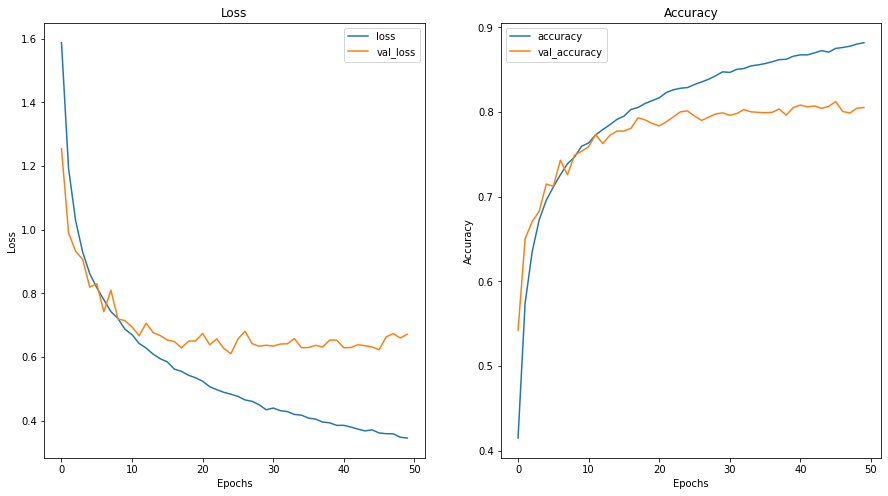

In [34]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.plot(c.history['loss'], label='loss')
plt.plot(c.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(122)
plt.plot(c.history['accuracy'], label='accuracy')
plt.plot(c.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 5

In [35]:
model5 = tf.keras.Sequential([
                             layers.Conv2D(32,(3,3), activation='relu', strides=(1,1), input_shape=(32,32,3)),                              
                             layers.Conv2D(64, (3,3), activation='relu', strides=(1,1)),
                             layers.Conv2D(128, (3,3), activation='relu', strides=(1,1)),
                             layers.Conv2D(256, (3,3), activation='relu', strides=(1,1)),
                             layers.MaxPool2D((2,2)),
                             layers.Dropout(0.5),

                             layers.Flatten(),
                             layers.Dense(128, activation='relu'),
                             layers.Dense(64, activation='relu'),
                             layers.Dense(10, activation='softmax')
])

model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model5.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 26, 26, 128)       73856     
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 24, 24, 256)       295168    
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 12, 12, 256)       0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 12, 12, 256)       0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 36864)           

In [36]:
c = model5.fit(train_images, train_labels, epochs=25, validation_data=(test_images, test_labels))

Epoch 1/25
1563/1563 [==============================] - 20s 12ms/step - loss: 1.7433 - accuracy: 0.3539 - val_loss: 1.1668 - val_accuracy: 0.5829
Epoch 2/25
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0998 - accuracy: 0.6091 - val_loss: 0.9173 - val_accuracy: 0.6767
Epoch 3/25
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8704 - accuracy: 0.6947 - val_loss: 0.8585 - val_accuracy: 0.6990
Epoch 4/25
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7336 - accuracy: 0.7412 - val_loss: 0.8328 - val_accuracy: 0.7143
Epoch 5/25
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6372 - accuracy: 0.7762 - val_loss: 0.8381 - val_accuracy: 0.7154
Epoch 6/25
1563/1563 [==============================] - 19s 12ms/step - loss: 0.5765 - accuracy: 0.7970 - val_loss: 0.8955 - val_accuracy: 0.7070
Epoch 7/25
1563/1563 [==============================] - 19s 12ms/step - loss: 0.4928 - accuracy: 0.8250 - val_loss: 0.8327 -

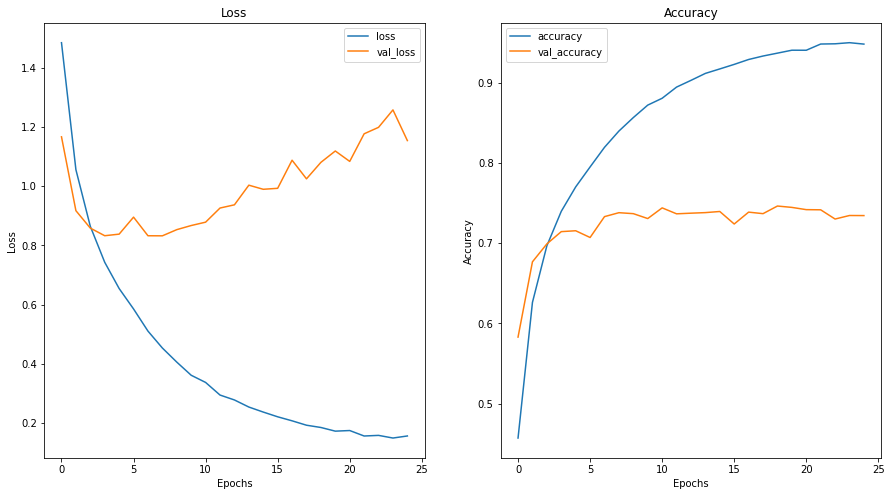

In [37]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.plot(c.history['loss'], label='loss')
plt.plot(c.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(122)
plt.plot(c.history['accuracy'], label='accuracy')
plt.plot(c.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()